# Project 9 - Working with OLS

Having built statistics functions, we are now ready to build a function for regression analysis. We will start by building the an regression. We will use linear algebra to estimate parameters that minimize the sum of the squared errors. This is an ordinary least squares regression. 

An OLS regression with one exogenous variable takes the form. 

$y = \alpha + \beta_1x_1 + \mu $

$\beta_0 = \alpha + \mu$

We merge the error term, which represents bias in the data, with alpha to yield the constant, $\beta_0$. This is necessary since OLS assumes an unbiased estimator where:

$\sum_{i=0}^{n-1} e_{i}=0$

Each estimate of a point created from a particular observation takes the form.

$y_i = \beta_0 + \beta_1x_{1,i} + e_i$

This can be generalized to include k exogenous variables:

$y_i = \beta_0 + (\sum_{j=1}^{k} \beta_jx_{i,j}) + e_i$

Ideally, we want to form a prediction where, on average, the right-hand side of the equation  yields the correct value on the left-hand side. When we perform an OLS regression, we form a predictor that minimizes the sum of the distance between each predicted value and the observed value drawn from the data. For example, if the prediction for a particular value of y is 8, and the actual value is 10, the error of the prediction is -2 and the squared error is 4.

To find the function that minimizes the sum squared errors, we will use matrix algebra, also known as linear algebra. For those unfamiliar, the next section uses the numpy library to perform matrix operations. For clarity, we will review the linear algebra functions that we will use with simple examples.

## Linear Algebra for OLS

We solve the following function for a vector of beta values ($\beta$), constants whose values represent estimates of the effect of variables in the set **_X_** on the selected endogenously generate variable $y$. The matrix **_X_** also includes a vector of ones used to estimate the constant $\beta_0$.

$\beta = (X'X)^{-1}X'Y$

$Y =$ Observations for Endogenous Variable

$X =$ Observations for Exogenous Variables

$X' =$ $X$-transpose

$(X'X)^{-1} =$ Inverse of $X'X$

### Inverting a Matrix

In reviewing the linear equation for estimating $\beta$, we confront two unique operations worth understanding. Included in these are some key concepts in linear algebra, including the identity matrix $I$ and linear independence. The best way to understand these concepts is by working with some sample vectors. Consider the matrix $X$ consisting of vectors $x_0$,$x_1$,…,$x_{n-1}$,$x_n$. We must check that these vectors are linearly independent. We do this by joining $X$ with an identity matrix and thus create:

$A = [XI]$

We transform this to show that the product of $A$ and $X^{-1}$ is equal to the product of and an identity matrix, $I$ and $X^{-1}$

$AX^{-1} = [XI]X^{-1}$

$AX^{-1} = [IX^{-1}]$

Let us solve for $AX^{-1}$ using the following vectors for $X$. 

$\begin{equation*}
X = \begin{bmatrix}
1 & 2 & 1 \\
4 & 1 & 5 \\
6 & 8 & 6
\end{bmatrix}
\end{equation*}$

Concatenate a 3 X 3 identity matrix on the left of $X$:

$\begin{equation*}
I = \begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
\end{equation*}$

$\begin{equation*}
[XI] = \begin{bmatrix}
1 & 2 & 1 & 1 & 0 & 0 \\
4 & 1 & 5 & 0 & 1 & 0 \\
6 & 8 & 6 & 0 & 0 & 1
\end{bmatrix}
\end{equation*}$

If we perform row operations on $A$ to transform $X$ in $[XI]$ into $I$, then we $I$ will be transformed into $X^{-1}$:

$\begin{equation*}
[XI] = \begin{bmatrix}
1 & 2 & 1 & 1 & 0 & 0 \\
4 & 1 & 5 & 0 & 1 & 0 \\
6 & 8 & 6 & 0 & 0 & 1
\end{bmatrix}
\end{equation*}$




$\begin{equation*}
r_2 - 4r_1:\begin{bmatrix}
1 & 2 & 1 & 1 & 0 & 0 \\
0 & -7 & 1 & -4 & 1 & 0 \\
6 & 8 & 6 & 0 & 0 & 1
\end{bmatrix}
\end{equation*}$


$\begin{equation*}
r_3 - 6r_1:\begin{bmatrix}
1 & 2 & 1 & 1 & 0 & 0 \\
0 & -7 & 1 & -4 & 1 & 0 \\
0 & -4 & 0 & -6 & 0 & 1
\end{bmatrix}
\end{equation*}$


$\begin{equation*}
r_2 \leftrightarrow r_3:\begin{bmatrix}
1 & 2 & 1 & 1 & 0 & 0 \\
0 & -4 & 0 & -6 & 0 & 1\\
0 & -7 & 1 & -4 & 1 & 0 
\end{bmatrix}
\end{equation*}$

$\begin{equation*}
r_2/{-4}:\begin{bmatrix}
1 & 2 & 1 & 1 & 0 & 0 \\
0 & 1 & 0 & 3/2 & 0 & -1/4\\
0 & -7 & 1 & -4 & 1 & 0 
\end{bmatrix}
\end{equation*}$

$\begin{equation*}
r_3 + 7r_2:\begin{bmatrix}
1 & 2 & 1 & 1 & 0 & 0 \\
0 & 1 & 0 & 3/2 & 0 & -1/4\\
0 & 0 & 1 & 13/2 & 1 & -7/4 
\end{bmatrix}
\end{equation*}$

$\begin{equation*}
r_1 + -2r_2 - r_3:\begin{bmatrix}
1 & 0 & 0 & -17/2 & -1 & 9/4 \\
0 & 1 & 0 & 3/2 & 0 & -1/4\\
0 & 0 & 1 & 13/2 & 1 & -7/4 
\end{bmatrix}
\end{equation*}$

$\begin{equation*}
IX^{-1}=\begin{bmatrix}
1 & 0 & 0 & -8.5 & -1 & 2.25 \\
0 & 1 & 0 & 1.5 & 0 & -0.25\\
0 & 0 & 1 & 6.5 & 1 & -1.75 
\end{bmatrix}
\end{equation*}$

$\begin{equation*}
X^{-1}=\begin{bmatrix}
-8.5 & -1 & 2.25 \\
1.5 & 0 & -0.25\\
6.5 & 1 & -1.75 
\end{bmatrix}
\end{equation*}$

By transforming $X$ in matrix $XI$ into an identity matrix, we transform the $I$ matrix into $X^{-1}$. This also confirms that the vectors comprising X are independent, meaning that one vector in the set comprising $X$ cannot be formed from the combination and or transformation of the others. A fundamental assumption of regression analysis is that data generated from factors believed to determine the y-values are independent of one another.

### Linear Algebra in _numpy_

We can check this using linear algebra functions in numpy. We start by creating numpy arrays that we will transform into vectors in the second step. 

In [1]:
import numpy as np

# create basis for matrix in np.array
x1 = np.array([1,2,1])
x2 = np.array([4,1,5])
x3 = np.array([6,8,6])
print(x1,x2,x3, sep = "\n")

[1 2 1]
[4 1 5]
[6 8 6]


In [2]:
# convert np.arrays to np.matrix values. 
x1 = np.matrix(x1)
x2 = np.matrix(x2)
x3 = np.matrix(x3)
print(x1,x2,x3, sep = "\n")

[[1 2 1]]
[[4 1 5]]
[[6 8 6]]


In [3]:
# Combine the separate matrix values into one matrix
X = np.concatenate((x1,x2,x3))
X

matrix([[1, 2, 1],
        [4, 1, 5],
        [6, 8, 6]])

In [4]:
# to create an inverse matrix, we can just use X.getI(). This allows us to bypass the algebra
X_inverse = X.getI()
X_inverse

matrix([[-8.5000000e+00, -1.0000000e+00,  2.2500000e+00],
        [ 1.5000000e+00, -7.6861594e-17, -2.5000000e-01],
        [ 6.5000000e+00,  1.0000000e+00, -1.7500000e+00]])

In [5]:
# to round out this number that was supposed to be zero, we use np.round
np.round(X_inverse, 2)

array([[-8.5 , -1.  ,  2.25],
       [ 1.5 , -0.  , -0.25],
       [ 6.5 ,  1.  , -1.75]])

In [6]:
# Swaps i and j rows. Allows for transposition of data if it is unorganized or in a 
# difficult position. This allows for better computation
X_transpose = X.getT()
X_transpose

matrix([[1, 4, 6],
        [2, 1, 8],
        [1, 5, 6]])

## Regression Function

Now that we have learned the necessary operations, we can understand the operations of the regression function. If you would like to build your own regression module, reconstruct the scripts form Chapter 7. In this lesson, we will use the statsmodels OLS method to reconstruct and compare statistics from an OLS regression. 

Recall that we estimate the vector of beta parameters for each variable with the equation:

$\beta = (X'X)^{-1}X'Y$

Each estimated $\beta$ value is multiplied by each observation of the relevant exogenous variable estimate the effect of the value on the endogenous, $Y$, value.

We will run a regression In order to estimate the parameters, we will need to import data, define the dependent variable and independent variables, and transform these into matrix objects. 

Let's use the data from chapter 6 with the addition real GDP per capita. This combined set of data is saved in the repository as a file created in chapter 8.

In [7]:
# We now can use this linear algebra to calculate the betas in our regression. 

# Now we will import data and run a regression

In [8]:
import pandas as pd
import statsmodels.api as sm

# download madison economic data from the source document. This GDP data goes back far
# to virtually the beginning of recorded economics
mgdp = pd.read_excel(
    "https://www.rug.nl/ggdc/historicaldevelopment/maddison/data/mpd2020.xlsx",
                    index_col = [0,2],
                    parse_dates = True,
                    sheet_name = "Full data")
mgdp

country      gdppc          pop
countrycode year                                     
AFG         1820  Afghanistan        NaN   3280.00000
            1870  Afghanistan        NaN   4207.00000
            1913  Afghanistan        NaN   5730.00000
            1950  Afghanistan  1156.0000   8150.00000
            1951  Afghanistan  1170.0000   8284.00000
...                       ...        ...          ...
ZWE         2014     Zimbabwe  1594.0000  13313.99205
            2015     Zimbabwe  1560.0000  13479.13812
            2016     Zimbabwe  1534.0000  13664.79457
            2017     Zimbabwe  1582.3662  13870.26413
            2018     Zimbabwe  1611.4052  14096.61179

[21682 rows x 3 columns]

In [9]:
# use the excel file that we downloaded previously on the economic freedom of the world
# 2022 master data. We are planning to incorporate the above data into this EFOTW data

# make sure to parse_dates so that pandas recognizes dates correctly


filename = "efotw-2022-master-index-data-for-researchers-iso.xlsx"
data = pd.read_excel(filename,
                    index_col = [2,0],
                     header = [0],
                     sheet_name = "EFW Panel Data 2022 Report")


data

,,ISO_Code_2,World Bank Region,"World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)",Countries,Panel Data Summary Index,Area 1,Area 2,Area 3,Area 4,Area 5,Standard Deviation of the 5 EFW Areas
ISO_Code_3,Year,,,,,,,,,,,
ALB,2020,AL,Europe & Central Asia,UM,Albania,7.640000,7.817077,5.260351,9.788269,8.222499,7.112958,1.652742
DZA,2020,DZ,Middle East & North Africa,LM,Algeria,5.120000,4.409943,4.131760,7.630287,3.639507,5.778953,1.613103
AGO,2020,AO,Sub-Saharan Africa,LM,Angola,5.910000,8.133385,3.705161,6.087996,5.373190,6.227545,1.598854
ARG,2020,AR,Latin America & the Caribbean,UM,Argentina,4.870000,6.483768,4.796454,4.516018,3.086907,5.490538,1.254924
ARM,2020,AM,Europe & Central Asia,UM,Armenia,7.840000,7.975292,6.236215,9.553009,7.692708,7.756333,1.178292
...,...,...,...,...,...,...,...,...,...,...,...,...
VEN,1970,VE,Latin America & the Caribbean,NaN,"Venezuela, RB",7.242943,8.349529,5.003088,9.621851,7.895993,5.209592,2.028426
VNM,1970,VN,East Asia & Pacific,NaN,Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YEM,1970,YE,Middle East & North Africa,NaN,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# transform names so that they are more easily understandable. We have done this before in 
# previous lessons

rename = {"Panel Data Summary Index": "Summary",
         "Area 1":"Size of Government",
         "Area 2":"Legal System and Property Rights",
         "Area 3":"Sound Money",
         "Area 4":"Freedom to Trade Internationally",
         "Area 5":"Regulation"}

# this will drop all rows with only null values and rename columns based on the above 

data = data.dropna(how="all", axis = 1).rename(columns = rename)
data

,,ISO_Code_2,World Bank Region,"World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)",Countries,Summary,Size of Government,Legal System and Property Rights,Sound Money,Freedom to Trade Internationally,Regulation,Standard Deviation of the 5 EFW Areas
ISO_Code_3,Year,,,,,,,,,,,
ALB,2020,AL,Europe & Central Asia,UM,Albania,7.640000,7.817077,5.260351,9.788269,8.222499,7.112958,1.652742
DZA,2020,DZ,Middle East & North Africa,LM,Algeria,5.120000,4.409943,4.131760,7.630287,3.639507,5.778953,1.613103
AGO,2020,AO,Sub-Saharan Africa,LM,Angola,5.910000,8.133385,3.705161,6.087996,5.373190,6.227545,1.598854
ARG,2020,AR,Latin America & the Caribbean,UM,Argentina,4.870000,6.483768,4.796454,4.516018,3.086907,5.490538,1.254924
ARM,2020,AM,Europe & Central Asia,UM,Armenia,7.840000,7.975292,6.236215,9.553009,7.692708,7.756333,1.178292
...,...,...,...,...,...,...,...,...,...,...,...,...
VEN,1970,VE,Latin America & the Caribbean,NaN,"Venezuela, RB",7.242943,8.349529,5.003088,9.621851,7.895993,5.209592,2.028426
VNM,1970,VN,East Asia & Pacific,NaN,Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YEM,1970,YE,Middle East & North Africa,NaN,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# we now concatenate the mgdp data into the 
data["RGDP Per Capita"] = mgdp["gdppc"]
data

,,ISO_Code_2,World Bank Region,"World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)",Countries,Summary,Size of Government,Legal System and Property Rights,Sound Money,Freedom to Trade Internationally,Regulation,Standard Deviation of the 5 EFW Areas,RGDP Per Capita
ISO_Code_3,Year,,,,,,,,,,,,
ALB,2020,AL,Europe & Central Asia,UM,Albania,7.640000,7.817077,5.260351,9.788269,8.222499,7.112958,1.652742,NaN
DZA,2020,DZ,Middle East & North Africa,LM,Algeria,5.120000,4.409943,4.131760,7.630287,3.639507,5.778953,1.613103,NaN
AGO,2020,AO,Sub-Saharan Africa,LM,Angola,5.910000,8.133385,3.705161,6.087996,5.373190,6.227545,1.598854,NaN
ARG,2020,AR,Latin America & the Caribbean,UM,Argentina,4.870000,6.483768,4.796454,4.516018,3.086907,5.490538,1.254924,NaN
ARM,2020,AM,Europe & Central Asia,UM,Armenia,7.840000,7.975292,6.236215,9.553009,7.692708,7.756333,1.178292,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
VEN,1970,VE,Latin America & the Caribbean,NaN,"Venezuela, RB",7.242943,8.349529,5.003088,9.621851,7.895993,5.209592,2.028426,15289.0
VNM,1970,VN,East Asia & Pacific,NaN,Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1172.0
YEM,1970,YE,Middle East & North Africa,NaN,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1961.0


In [12]:
# delete standard deviation column
del  data["Standard Deviation of the 5 EFW Areas"]

In [13]:
data

,,ISO_Code_2,World Bank Region,"World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)",Countries,Summary,Size of Government,Legal System and Property Rights,Sound Money,Freedom to Trade Internationally,Regulation,RGDP Per Capita
ISO_Code_3,Year,,,,,,,,,,,
ALB,2020,AL,Europe & Central Asia,UM,Albania,7.640000,7.817077,5.260351,9.788269,8.222499,7.112958,NaN
DZA,2020,DZ,Middle East & North Africa,LM,Algeria,5.120000,4.409943,4.131760,7.630287,3.639507,5.778953,NaN
AGO,2020,AO,Sub-Saharan Africa,LM,Angola,5.910000,8.133385,3.705161,6.087996,5.373190,6.227545,NaN
ARG,2020,AR,Latin America & the Caribbean,UM,Argentina,4.870000,6.483768,4.796454,4.516018,3.086907,5.490538,NaN
ARM,2020,AM,Europe & Central Asia,UM,Armenia,7.840000,7.975292,6.236215,9.553009,7.692708,7.756333,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
VEN,1970,VE,Latin America & the Caribbean,NaN,"Venezuela, RB",7.242943,8.349529,5.003088,9.621851,7.895993,5.209592,15289.0
VNM,1970,VN,East Asia & Pacific,NaN,Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,1172.0
YEM,1970,YE,Middle East & North Africa,NaN,"Yemen, Rep.",NaN,NaN,NaN,NaN,NaN,NaN,1961.0


In [14]:
data.reset_index(inplace = True)
data["Year"] = data["Year"].astype(str).astype("datetime64[ns]").sort_index()
data = data.set_index(["ISO_Code_3", "Year"]).sort_index()
data

ISO_Code_2   World Bank Region  \
ISO_Code_3 Year                                        
AGO        1970-01-01         AO  Sub-Saharan Africa   
           1975-01-01         AO  Sub-Saharan Africa   
           1980-01-01         AO  Sub-Saharan Africa   
           1985-01-01         AO  Sub-Saharan Africa   
           1990-01-01         AO  Sub-Saharan Africa   
...                          ...                 ...   
ZWE        2016-01-01         ZW  Sub-Saharan Africa   
           2017-01-01         ZW  Sub-Saharan Africa   
           2018-01-01         ZW  Sub-Saharan Africa   
           2019-01-01         ZW  Sub-Saharan Africa   
           2020-01-01         ZW  Sub-Saharan Africa   

                      World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
ISO_Code_3 Year                                                                                                                                              
AGO        1970-01-01                                                NaN                                                                                     
           1975-01-01                                                NaN                                                                                     
           1980-01-01                                                NaN                                                                                     
           1985-01-01                                                NaN                                                                                     
           1990-01-01                                                 LM                                                                                     
...                                                                  ...                                                                                     
ZWE        2016-01-01                                                  L                                                                                     
           2017-01-01                                                  L                                                                                     
           2018-01-01                                                 LM                                                                                     
           2019-01-01                                                 LM                                                                                     
           2020-01-01                                                 LM                                                                                     

                      Countries   Summary  Size of Government  \
ISO_Code_3 Year                                                 
AGO        1970-01-01    Angola       NaN                 NaN   
           1975-01-01    Angola       NaN                 NaN   
           1980-01-01    Angola       NaN                 NaN   
           1985-01-01    Angola       NaN                 NaN   
           1990-01-01    Angola       NaN                 NaN   
...                         ...       ...                 ...   
ZWE        2016-01-01  Zimbabwe  6.121996            5.332597   
           2017-01-01  Zimbabwe  5.599886            4.699843   
           2018-01-01  Zimbabwe  5.876298            5.170946   
           2019-01-01  Zimbabwe  4.719465            5.628359   
           2020-01-01  Zimbabwe  4.480000            5.562008   

                       Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                        
AGO        1970-01-01                               NaN          NaN   
           1975-01-01                               NaN          NaN   
           1980-01-01                               NaN          NaN   
           1985-01-01           

In [15]:
years = np.array(sorted(list(set(data.index.get_level_values("Year")))))
years = pd.date_range(years[0], years[-2], freq = "AS")
countries = sorted(list(set(data.index.get_level_values("ISO_Code_3"))))
index_names = list(data.index.names)
multi_index = pd.MultiIndex.from_product([countries, years[:-1]], names = data.index.names)
data = data.reindex(multi_index)
data

ISO_Code_2   World Bank Region  \
ISO_Code_3 Year                                        
AGO        1970-01-01         AO  Sub-Saharan Africa   
           1971-01-01        NaN                 NaN   
           1972-01-01        NaN                 NaN   
           1973-01-01        NaN                 NaN   
           1974-01-01        NaN                 NaN   
...                          ...                 ...   
ZWE        2014-01-01         ZW  Sub-Saharan Africa   
           2015-01-01         ZW  Sub-Saharan Africa   
           2016-01-01         ZW  Sub-Saharan Africa   
           2017-01-01         ZW  Sub-Saharan Africa   
           2018-01-01         ZW  Sub-Saharan Africa   

                      World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)  \
ISO_Code_3 Year                                                                                                                                              
AGO        1970-01-01                                                NaN                                                                                     
           1971-01-01                                                NaN                                                                                     
           1972-01-01                                                NaN                                                                                     
           1973-01-01                                                NaN                                                                                     
           1974-01-01                                                NaN                                                                                     
...                                                                  ...                                                                                     
ZWE        2014-01-01                                                  L                                                                                     
           2015-01-01                                                  L                                                                                     
           2016-01-01                                                  L                                                                                     
           2017-01-01                                                  L                                                                                     
           2018-01-01                                                 LM                                                                                     

                      Countries   Summary  Size of Government  \
ISO_Code_3 Year                                                 
AGO        1970-01-01    Angola       NaN                 NaN   
           1971-01-01       NaN       NaN                 NaN   
           1972-01-01       NaN       NaN                 NaN   
           1973-01-01       NaN       NaN                 NaN   
           1974-01-01       NaN       NaN                 NaN   
...                         ...       ...                 ...   
ZWE        2014-01-01  Zimbabwe  5.999147            6.771807   
           2015-01-01  Zimbabwe  6.449595            6.964753   
           2016-01-01  Zimbabwe  6.121996            5.332597   
           2017-01-01  Zimbabwe  5.599886            4.699843   
           2018-01-01  Zimbabwe  5.876298            5.170946   

                       Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                        
AGO        1970-01-01                               NaN          NaN   
           1971-01-01                               NaN          NaN   
           1972-01-01                               NaN          NaN   
           1973-01-01           

In [16]:
# we now save this file in an excel file
data.to_excel("EFWAndRGDP.xls")

C:\Users\Bryce Grabanski\AppData\Local\Temp\ipykernel_2948\1429734678.py:2: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  data.to_excel("EFWAndRGDP.xls")


In [17]:
# inspect the keys of this file
data.keys()

Index(['ISO_Code_2', 'World Bank Region',
       'World Bank Current Income Classification, 1990-present (L=Low income, LM=Lower middle income, UM=Upper middle income, H=High income)',
       'Countries', 'Summary', 'Size of Government',
       'Legal System and Property Rights', 'Sound Money',
       'Freedom to Trade Internationally', 'Regulation', 'RGDP Per Capita'],
      dtype='object')

In [18]:
# select subset for analysis
data = data[data.keys()[3:]]
data

Countries   Summary  Size of Government  \
ISO_Code_3 Year                                                 
AGO        1970-01-01    Angola       NaN                 NaN   
           1971-01-01       NaN       NaN                 NaN   
           1972-01-01       NaN       NaN                 NaN   
           1973-01-01       NaN       NaN                 NaN   
           1974-01-01       NaN       NaN                 NaN   
...                         ...       ...                 ...   
ZWE        2014-01-01  Zimbabwe  5.999147            6.771807   
           2015-01-01  Zimbabwe  6.449595            6.964753   
           2016-01-01  Zimbabwe  6.121996            5.332597   
           2017-01-01  Zimbabwe  5.599886            4.699843   
           2018-01-01  Zimbabwe  5.876298            5.170946   

                       Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                        
AGO        1970-01-01                               NaN          NaN   
           1971-01-01                               NaN          NaN   
           1972-01-01                               NaN          NaN   
           1973-01-01                               NaN          NaN   
           1974-01-01                               NaN          NaN   
...                                                 ...          ...   
ZWE        2014-01-01                          3.930143     7.664303   
           2015-01-01                          4.108142     7.859669   
           2016-01-01                          4.056407     8.086016   
           2017-01-01                          4.071445     7.983888   
           2018-01-01                          4.041897     7.312324   

                       Freedom to Trade Internationally  Regulation  \
ISO_Code_3 Year                                                       
AGO        1970-01-01                               NaN         NaN   
           1971-01-01                               NaN         NaN   
           1972-01-01                               NaN         NaN   
           1973-01-01                               NaN         NaN   
           1974-01-01                               NaN         NaN   
...                                                 ...         ...   
ZWE        2014-01-01                          6.398692    5.039824   
           2015-01-01                          6.509231    6.555970   
           2016-01-01                          6.404937    6.520805   
           2017-01-01                          4.503965    6.399757   
           2018-01-01                          6.396649    6.303135   

                       RGDP Per Capita  
ISO_Code_3 Year                         
AGO        1970-01-01        2818.0000  
           1971-01-01              NaN  
           1972-01-01              NaN  
           1973-01-01              NaN  
           1974-01-01              NaN  
...                                ...  
ZWE        2014-01-01        1594.0000  
           2015-01-01        1560.0000  
           2016-01-01        1534.0000  
           2017-01-01        1582.3662  
           2018-01-01        1611.4052  

[8085 rows x 8 columns]

In [19]:
# sort data in the by the index columns (previously defined first as iso code second as year)

# it is possible to transform to datetime, but we did not cover it in this lesson. 
# contact Dr. Caton for more assistance

data.sort_index(inplace = True)
data

C:\Users\Bryce Grabanski\AppData\Local\Temp\ipykernel_2948\3026834938.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_index(inplace = True)


Countries   Summary  Size of Government  \
ISO_Code_3 Year                                                 
AGO        1970-01-01    Angola       NaN                 NaN   
           1971-01-01       NaN       NaN                 NaN   
           1972-01-01       NaN       NaN                 NaN   
           1973-01-01       NaN       NaN                 NaN   
           1974-01-01       NaN       NaN                 NaN   
...                         ...       ...                 ...   
ZWE        2014-01-01  Zimbabwe  5.999147            6.771807   
           2015-01-01  Zimbabwe  6.449595            6.964753   
           2016-01-01  Zimbabwe  6.121996            5.332597   
           2017-01-01  Zimbabwe  5.599886            4.699843   
           2018-01-01  Zimbabwe  5.876298            5.170946   

                       Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                        
AGO        1970-01-01                               NaN          NaN   
           1971-01-01                               NaN          NaN   
           1972-01-01                               NaN          NaN   
           1973-01-01                               NaN          NaN   
           1974-01-01                               NaN          NaN   
...                                                 ...          ...   
ZWE        2014-01-01                          3.930143     7.664303   
           2015-01-01                          4.108142     7.859669   
           2016-01-01                          4.056407     8.086016   
           2017-01-01                          4.071445     7.983888   
           2018-01-01                          4.041897     7.312324   

                       Freedom to Trade Internationally  Regulation  \
ISO_Code_3 Year                                                       
AGO        1970-01-01                               NaN         NaN   
           1971-01-01                               NaN         NaN   
           1972-01-01                               NaN         NaN   
           1973-01-01                               NaN         NaN   
           1974-01-01                               NaN         NaN   
...                                                 ...         ...   
ZWE        2014-01-01                          6.398692    5.039824   
           2015-01-01                          6.509231    6.555970   
           2016-01-01                          6.404937    6.520805   
           2017-01-01                          4.503965    6.399757   
           2018-01-01                          6.396649    6.303135   

                       RGDP Per Capita  
ISO_Code_3 Year                         
AGO        1970-01-01        2818.0000  
           1971-01-01              NaN  
           1972-01-01              NaN  
           1973-01-01              NaN  
           1974-01-01              NaN  
...                                ...  
ZWE        2014-01-01        1594.0000  
           2015-01-01        1560.0000  
           2016-01-01        1534.0000  
           2017-01-01        1582.3662  
           2018-01-01        1611.4052  

[8085 rows x 8 columns]

In [20]:
reg_vars = list(data.keys())
reg_vars

['Countries',
 'Summary',
 'Size of Government',
 'Legal System and Property Rights',
 'Sound Money',
 'Freedom to Trade Internationally',
 'Regulation',
 'RGDP Per Capita']

In [21]:
# separate columns for analysis. We are using Real GDP per capita as our basis for Y in this analysis

reg_data = data[reg_vars].dropna()
y_var = [reg_vars[-1]]
x_vars = reg_vars[2:-1]
y_var, x_vars

(['RGDP Per Capita'],
 ['Size of Government',
  'Legal System and Property Rights',
  'Sound Money',
  'Freedom to Trade Internationally',
  'Regulation'])

In [22]:
# already imported statsmodel.api

# set x and y variables as well as add constant
y = reg_data[y_var]
X = reg_data[x_vars]
X["Constant"] = 1
results = sm.OLS(y, X).fit()

# X.values is a matrix

C:\Users\Bryce Grabanski\AppData\Local\Temp\ipykernel_2948\3363578376.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1


In [23]:
# create a summary by using results.summary() to view normal regression

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RGDP Per Capita   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     593.5
Date:                Sun, 16 Apr 2023   Prob (F-statistic):               0.00
Time:                        19:31:15   Log-Likelihood:                -34081.
No. Observations:                3145   AIC:                         6.817e+04
Df Residuals:                    3139   BIC:                         6.821e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of Government               -2752.2138    202.274    -13.606      0.000   -3148.817   -2355.611
Legal System and Property Rights  3966.0733    196.152     20.219      0.000    3581.474    4350.672
Sound Money                        902.3584    177.099      5.095      0.000     555.117    1249.599
Freedom to Trade Internationally  1279.8725    211.796      6.043      0.000     864.601    1695.144
Regulation                        2141.0305    281.044      7.618      0.000    1589.982    2692.079
Constant                          -1.66e+04   1627.397    -10.197      0.000   -1.98e+04   -1.34e+04
==============================================================================
Omnibus:                     2952.722   Durbin-Watson:                   0.174
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           189244.770
Skew:                           4.324   Prob(JB):                         0.00
Kurtosis:                      40.005   Cond. No.                         113.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
#use predictor to develop a prediction

predictor = results.predict()


# add a column for predicted value based on regression
reg_data[y_var[0] + " Predictor"] = predictor
reg_data

Countries   Summary  Size of Government  \
ISO_Code_3 Year                                                 
AGO        2005-01-01    Angola  4.214590            6.886311   
           2006-01-01    Angola  4.531179            5.162277   
           2007-01-01    Angola  4.550966            4.963676   
           2008-01-01    Angola  4.643633            4.715589   
           2009-01-01    Angola  5.251115            7.455501   
...                         ...       ...                 ...   
ZWE        2014-01-01  Zimbabwe  5.999147            6.771807   
           2015-01-01  Zimbabwe  6.449595            6.964753   
           2016-01-01  Zimbabwe  6.121996            5.332597   
           2017-01-01  Zimbabwe  5.599886            4.699843   
           2018-01-01  Zimbabwe  5.876298            5.170946   

                       Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                        
AGO        2005-01-01                          3.129619     1.270081   
           2006-01-01                          3.238314     3.807267   
           2007-01-01                          3.224507     4.015297   
           2008-01-01                          3.382642     4.653201   
           2009-01-01                          3.394515     4.901540   
...                                                 ...          ...   
ZWE        2014-01-01                          3.930143     7.664303   
           2015-01-01                          4.108142     7.859669   
           2016-01-01                          4.056407     8.086016   
           2017-01-01                          4.071445     7.983888   
           2018-01-01                          4.041897     7.312324   

                       Freedom to Trade Internationally  Regulation  \
ISO_Code_3 Year                                                       
AGO        2005-01-01                          5.356979    4.511067   
           2006-01-01                          5.302944    5.118114   
           2007-01-01                          5.139768    5.348260   
           2008-01-01                          5.181950    5.185843   
           2009-01-01                          5.503538    5.007256   
...                                                 ...         ...   
ZWE        2014-01-01                          6.398692    5.039824   
           2015-01-01                          6.509231    6.555970   
           2016-01-01                          6.404937    6.520805   
           2017-01-01                          4.503965    6.399757   
           2018-01-01                          6.396649    6.303135   

                       RGDP Per Capita  RGDP Per Capita Predictor  
ISO_Code_3 Year                                                    
AGO        2005-01-01        3708.7706               -5474.902171  
           2006-01-01        4592.3373                3221.099672  
           2007-01-01        5773.5483                4184.555105  
           2008-01-01        6743.7482                5776.385317  
           2009-01-01        7087.6041               -1464.025089  
...                                ...                        ...  
ZWE        2014-01-01        1594.0000                6250.400915  
           2015-01-01        1560.0000                9989.206335  
           2016-01-01        1534.0000               14271.539452  
           2017-01-01        1582.3662               13288.328954  
           2018-01-01        1611.4052               13484.096702  

[3145 rows x 9 columns]

In [25]:
# Caluculate SSE, SSR, & SST
# SSE = sum square errors, SSR = sum squared from regression, SST = total sum squares


# convert these to name[0] for this next analysis. Make sure all data has same number of rows.

y_hat = reg_data[y_var[0] + " Predictor"]
y_mean = reg_data[y_var[0]].mean()
y = reg_data[y_var[0]]

In [26]:
# calculate residuals by subtracting prediction from actual
reg_data["Residuals"] = (y.sub(y_hat))
reg_data["Squared Explained"] = y_hat.sub(y_mean).pow(2)
reg_data["Squared Residuals"] = y.sub(y_hat).pow(2)
reg_data["Squared Totals"] = y.sub(y_mean).pow(2)

reg_data

Countries   Summary  Size of Government  \
ISO_Code_3 Year                                                 
AGO        2005-01-01    Angola  4.214590            6.886311   
           2006-01-01    Angola  4.531179            5.162277   
           2007-01-01    Angola  4.550966            4.963676   
           2008-01-01    Angola  4.643633            4.715589   
           2009-01-01    Angola  5.251115            7.455501   
...                         ...       ...                 ...   
ZWE        2014-01-01  Zimbabwe  5.999147            6.771807   
           2015-01-01  Zimbabwe  6.449595            6.964753   
           2016-01-01  Zimbabwe  6.121996            5.332597   
           2017-01-01  Zimbabwe  5.599886            4.699843   
           2018-01-01  Zimbabwe  5.876298            5.170946   

                       Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                        
AGO        2005-01-01                          3.129619     1.270081   
           2006-01-01                          3.238314     3.807267   
           2007-01-01                          3.224507     4.015297   
           2008-01-01                          3.382642     4.653201   
           2009-01-01                          3.394515     4.901540   
...                                                 ...          ...   
ZWE        2014-01-01                          3.930143     7.664303   
           2015-01-01                          4.108142     7.859669   
           2016-01-01                          4.056407     8.086016   
           2017-01-01                          4.071445     7.983888   
           2018-01-01                          4.041897     7.312324   

                       Freedom to Trade Internationally  Regulation  \
ISO_Code_3 Year                                                       
AGO        2005-01-01                          5.356979    4.511067   
           2006-01-01                          5.302944    5.118114   
           2007-01-01                          5.139768    5.348260   
           2008-01-01                          5.181950    5.185843   
           2009-01-01                          5.503538    5.007256   
...                                                 ...         ...   
ZWE        2014-01-01                          6.398692    5.039824   
           2015-01-01                          6.509231    6.555970   
           2016-01-01                          6.404937    6.520805   
           2017-01-01                          4.503965    6.399757   
           2018-01-01                          6.396649    6.303135   

                       RGDP Per Capita  RGDP Per Capita Predictor  \
ISO_Code_3 Year                                                     
AGO        2005-01-01        3708.7706               -5474.902171   
           2006-01-01        4592.3373                3221.099672   
           2007-01-01        5773.5483                4184.555105   
           2008-01-01        6743.7482                5776.385317   
           2009-01-01        7087.6041               -1464.025089   
...                                ...                        ...   
ZWE        2014-01-01        1594.0000                6250.400915   
           2015-01-01        1560.0000                9989.206335   
           2016-01-01        1534.0000               14271.539452   
           2017-01-01        1582.3662               13288.328954   
           2018-01-01        1611.4052               13484.096702   

                          Residuals  Squared Explained  Squared Residuals  \
ISO_Code_3 Year                                                             
AGO        2005-01-01   9183.672771       4.693919e+08       8.433985e+07   
           2006-01-01   1371.237628       1.682067e+08       1.880293e+06   
           2007-01-01   1588.993195       1.441440e+08       2.524899e+06   
           2008-01-01    967.362

In [27]:
# Take sums of columns so we can caluclate the SSR, SSE, and SST

SSR = reg_data["Squared Explained"].sum()
SSE = reg_data["Squared Residuals"].sum()
SST = reg_data["Squared Totals"].sum()
SSR, SSE, SST

(450042843462.08417, 476075689815.21045, 926118533277.2952)

# Calculate Estimator Variance 
With the sum of squared errors calculated, the next step is to calculate the estimator variance and use this to construct the covariance matrix. The covariance matrix is used to derive the standard errors and related statistics for each estimated coefficient.

We estimate the variance of the error term of the estimator for the dependent variable. 

$\sigma^2 = \frac{SSE}{n-k}$

$n = $number of observations

$k = $number of independent variables

An increase in the number of exogenous variables tends ot increase the fit of a model. By dividing the $SSE$ by degrees of freedom, $n-k$ , improvements in fit that result from increases in the number of variables are offset in part by a reduction in degrees of freedom. 

Finally, we calculate the covariance matrix, $(X'X)^{-1}$:

$\sigma^2 (X'X)^{-1}$


In [28]:
# use results tab to retrieve our k and n variables for calculation
# create estimator variance calculation

n = results.nobs
k = len(results.params)
estimator_variance = SSE / (n - k)
n, k, estimator_variance

(3145.0, 6, 151664762.60439962)

In [29]:
# covariance matrix

cov_matrix = results.cov_params()
cov_matrix

,Size of Government,Legal System and Property Rights,Sound Money,Freedom to Trade Internationally,Regulation,Constant
Size of Government,40914.793154,15255.069988,-1703.383623,-8958.214157,-10448.584144,-2.067504e+05
Legal System and Property Rights,15255.069988,38475.583705,-2060.902767,-14360.980502,-22112.680701,-4.271058e+04
Sound Money,-1703.383623,-2060.902767,31363.960883,-15910.601600,-10972.822920,-4.080877e+04
Freedom to Trade Internationally,-8958.214157,-14360.980502,-15910.601600,44857.357302,-14664.804830,5.259640e+04
Regulation,-10448.584144,-22112.680701,-10972.822920,-14664.804830,78985.583047,-1.570828e+05
Constant,-206750.428690,-42710.577560,-40808.774501,52596.396443,-157082.849671,2.648421e+06


In [30]:
XtX = np.matmul(X.T,X)
XtX

C:\Users\Bryce Grabanski\AppData\Local\Temp\ipykernel_2948\3103196807.py:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  XtX = np.matmul(X.T,X)


,0,1,2,3,4,5
Size of Government,141484.695077,108774.052078,162643.771815,142007.159146,139402.320819,20753.407457
Legal System and Property Rights,108774.052078,96994.453833,134418.347975,118666.346951,115277.758214,16607.612987
Sound Money,162643.771815,134418.347975,200766.348620,172886.592503,167817.862613,24478.311027
Freedom to Trade Internationally,142007.159146,118666.346951,172886.592503,154122.857150,147048.993695,21324.480262
Regulation,139402.320819,115277.758214,167817.862613,147048.993695,145031.364112,21009.196601
Constant,20753.407457,16607.612987,24478.311027,21324.480262,21009.196601,3145.000000


In [31]:
XtXInv = np.matrix(np.matmul(X.T, X)).getI()
XtXInv

C:\Users\Bryce Grabanski\AppData\Local\Temp\ipykernel_2948\2128293354.py:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  XtXInv = np.matrix(np.matmul(X.T, X)).getI()


matrix([[ 2.69771254e-04,  1.00584142e-04, -1.12312418e-05,
         -5.90658898e-05, -6.88926285e-05, -1.36320675e-03],
        [ 1.00584142e-04,  2.53688352e-04, -1.35885405e-05,
         -9.46889723e-05, -1.45799725e-04, -2.81611739e-04],
        [-1.12312418e-05, -1.35885405e-05,  2.06797943e-04,
         -1.04906383e-04, -7.23491913e-05, -2.69072221e-04],
        [-5.90658898e-05, -9.46889723e-05, -1.04906383e-04,
          2.95766509e-04, -9.66922348e-05,  3.46793781e-04],
        [-6.88926285e-05, -1.45799725e-04, -7.23491913e-05,
         -9.66922348e-05,  5.20790602e-04, -1.03572410e-03],
        [-1.36320675e-03, -2.81611739e-04, -2.69072221e-04,
          3.46793781e-04, -1.03572410e-03,  1.74623375e-02]])

In [32]:
# calculate covariance matrix by hand (using matrices)
# XtXInv = np.matrix(np.matmul(X.T, X)).getI()

# multiply by estimator_variance
ev_mul_XtXInv = estimator_variance * XtXInv

# transform into pandas dataframe for easy visual 
pd.DataFrame(ev_mul_XtXInv, 
             columns = X.keys(), index = X.keys())



,Size of Government,Legal System and Property Rights,Sound Money,Freedom to Trade Internationally,Regulation,Constant
Size of Government,40914.793154,15255.069988,-1703.383623,-8958.214157,-10448.584144,-2.067504e+05
Legal System and Property Rights,15255.069988,38475.583705,-2060.902767,-14360.980502,-22112.680701,-4.271058e+04
Sound Money,-1703.383623,-2060.902767,31363.960883,-15910.601600,-10972.822920,-4.080877e+04
Freedom to Trade Internationally,-8958.214157,-14360.980502,-15910.601600,44857.357302,-14664.804830,5.259640e+04
Regulation,-10448.584144,-22112.680701,-10972.822920,-14664.804830,78985.583047,-1.570828e+05
Constant,-206750.428690,-42710.577560,-40808.774501,52596.396443,-157082.849671,2.648421e+06


In [33]:
# now we need to compare these to the other results

results.params

Size of Government                  -2752.213782
Legal System and Property Rights     3966.073311
Sound Money                           902.358447
Freedom to Trade Internationally     1279.872496
Regulation                           2141.030500
Constant                           -16595.251456
dtype: float64

In [34]:
# show betas and compare to x_vars in covariance matrix

# create our own regression output based on manual computation 
# (same as above pre-made process)

parameters = {}

#print("beta", "\t\t\tSE")
for x_var in X.keys():
    beta_x = results.params[x_var]
    StdErrX = cov_matrix.loc[x_var][x_var]**.5
#    print(beta_x, StdErrX, sep = "\t")
#    print("t:", beta_x / StdErrX)
    parameters[x_var] = {}
    parameters[x_var]["Beta"] = beta_x
    parameters[x_var]["SE"] = StdErrX
    parameters[x_var]["t-stats"] = beta_x / StdErrX
parameters = pd.DataFrame(parameters).T
parameters

,Beta,SE,t-stats
Size of Government,-2752.213782,202.274055,-13.606361
Legal System and Property Rights,3966.073311,196.151940,20.219394
Sound Money,902.358447,177.098732,5.095228
Freedom to Trade Internationally,1279.872496,211.795555,6.042962
Regulation,2141.030500,281.043739,7.618140
Constant,-16595.251456,1627.397087,-10.197420


 # Calculate $R^2$

The variance term will be used to help us calculate other values. First we estimate the square root of the mean squared error. Since the mean squared error is the variance of the estimator, this means we simply take the square root the variance term

$rootMSE = \sqrt{\sigma^2}$

The square-root of the MSE provides a more readily interpretable estimate of the estimator variance, showing the average distance of predicted values from actual values, corrected for the number of independent variables. 

We also estimate the R2 value. This value indicates the explanator power of the regression

$R^2 = \frac{SSR}{SST}$

This compares the average squared distance between the predicted values and the average value against the average squared distance between observed values and average values. Ordinary least squares regression minimizes the squared distance between the predicted value and the average value. If values are perfectly predicted, then the SSR would equal the SST. Usually, the SSR is less than the SST. It will never be greater than the SST.


In [35]:
# calculate rsquared
r2 = SSR / SST
r2

0.48594518659452623

### Adjusted R-Squared
Although the $R^2$ is a useful measure to understand the quality of the explanation provided by the selected exogenous variables. Recall that:

$R^2 = \frac{SSR}{SST}$


Notice that as the degrees of freedom decrease, the numerator necessarily decreases as well. One should not depend solely on the adjusted $R^2$ to consider the strength of a regression's results, but it is often useful to help gauge whether or not a marginal addition of a variable improves explanatory power of a regression.

${R^2}_{Adjusted} = 1 - \frac{\frac{SSE}{n - k}}{\frac{SST}{n-1}}$


In [36]:
# as the number of explanitory variables increases, the adjusted r2 reduces in value

r2_adjusted = 1 - (SSE / (n - k)) / (SST / (n - 1))
r2_adjusted

0.485126367203948

# Check the distribution of residuals

(array([-50000., -25000.,      0.,  25000.,  50000.,  75000., 100000.,
        125000., 150000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

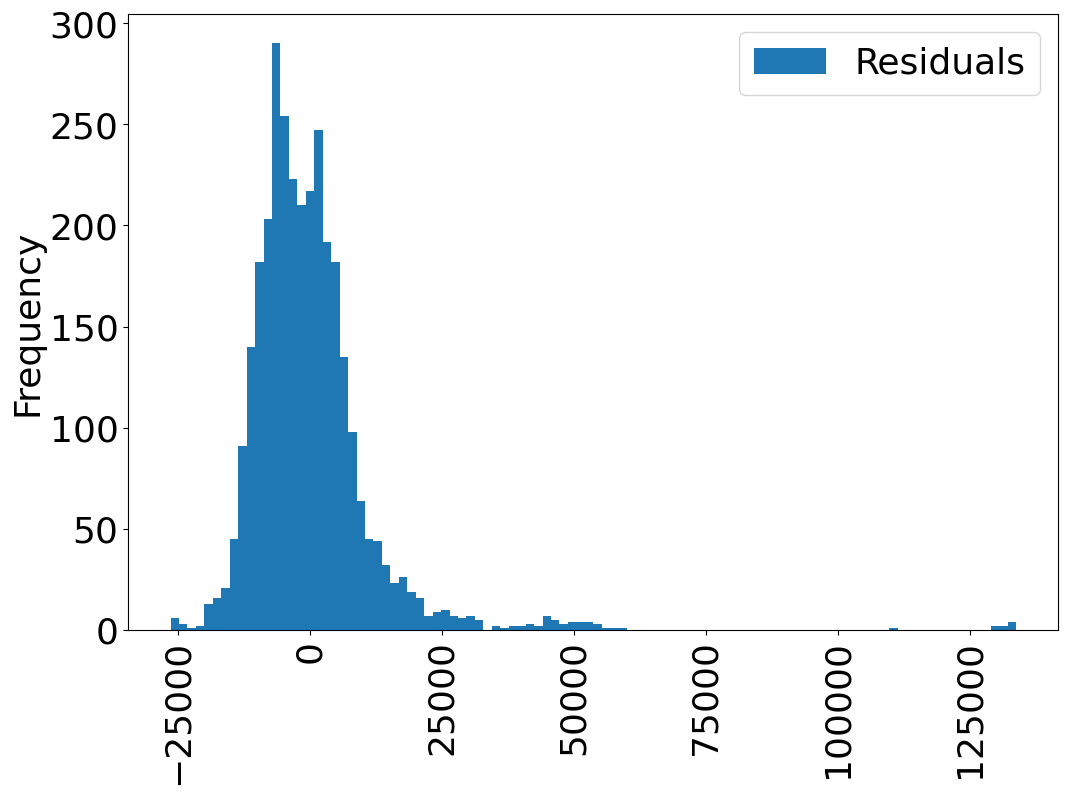

In [37]:
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size":26})
fig, ax = plt.subplots(figsize = (12,8))
reg_data[["Residuals"]].plot.hist(bins = 100, ax = ax)
plt.xticks(rotation=90)

### thinking through unit-root and Cointegration problems

<AxesSubplot:xlabel='Year'>

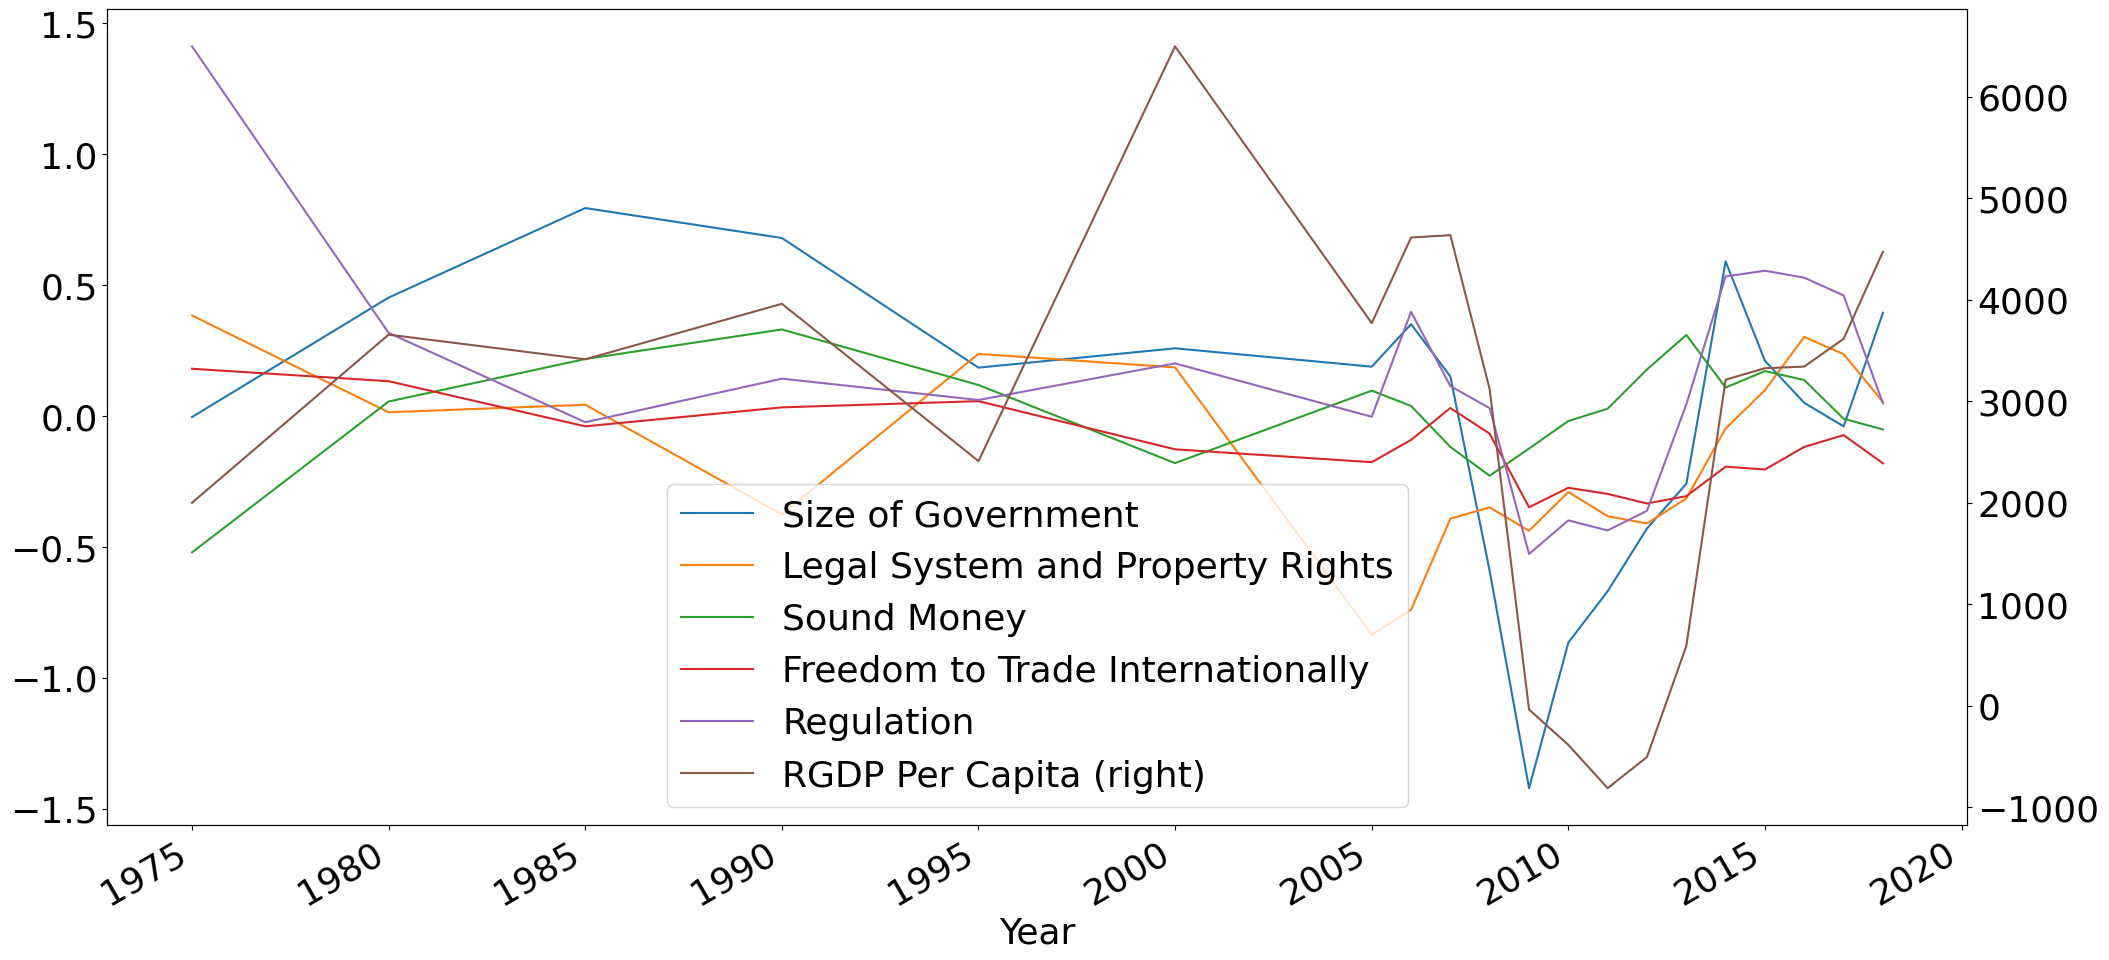

In [38]:
# plot the real GDP per capita vs our economic freedom

# difference graph showed below of five year differences

# data bias present since recent data is more easily found,
# old data appears more intermittently, so inherit bias is found here

plot_df = data.loc["USA"][x_vars + y_var]
fig, ax = plt.subplots(figsize = (24,12))
plot_df.diff(5).dropna().plot.line(ax = ax, secondary_y = y_var, legend = True)

<AxesSubplot:ylabel='Frequency'>

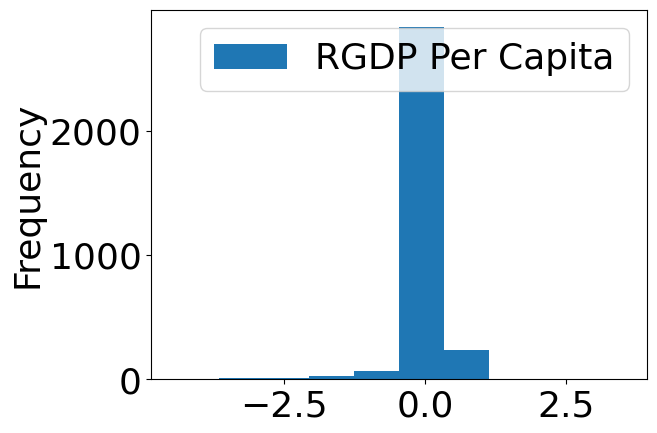

In [39]:
# using log difference helps to push assumptions towards a normalized 
# distribution. Below it shows this distribution with few outliers

np.log(data[y_var]).diff(5).plot.hist(bins = 10)

### Warning: having more recent data biases estimates toward present inferences from present data

In [40]:
## Regressions with Logged Differences
years_diff = 5
reg_data = data
# take the log of real gdp then group by difference
reg_data["RGDP Per Capita"] = np.log(data["RGDP Per Capita"]).groupby(
    "ISO_Code_3").diff(years_diff) 

# replace infinite values with null values since it will cause issues
reg_data = reg_data.replace([np.inf, -np.inf], np.nan)
reg_data.loc["USA"]


C:\Users\Bryce Grabanski\AppData\Local\Temp\ipykernel_2948\732973027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["RGDP Per Capita"] = np.log(data["RGDP Per Capita"]).groupby(


,Countries,Summary,Size of Government,Legal System and Property Rights,Sound Money,Freedom to Trade Internationally,Regulation,RGDP Per Capita
Year,,,,,,,,
1970-01-01,United States,7.615181,5.341231,8.286741,9.588817,8.232334,6.631262,NaN
1971-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1974-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975-01-01,United States,7.907324,5.336851,8.670280,9.067438,8.412407,8.042706,0.080100
1976-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1977-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1978-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
r_df = reg_data.dropna(axis = 0, how = "any")
y = r_df[y_var]
X = r_df[x_vars]
X["Constant"] = 1
results = sm.OLS(y, X).fit()
r_df["Predictor"] = results.predict()
r_df["Residuals"] = results.resid
results.summary()

C:\Users\Bryce Grabanski\AppData\Local\Temp\ipykernel_2948\409861495.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
C:\Users\Bryce Grabanski\AppData\Local\Temp\ipykernel_2948\409861495.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_df["Predictor"] = results.predict()
C:\Users\Bryce Grabanski\AppData\Local\Temp\ipykernel_2948\409861495.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        RGDP Per Capita   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     25.34
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           4.95e-25
Time:                        19:31:17   Log-Likelihood:                 1105.2
No. Observations:                2606   AIC:                            -2198.
Df Residuals:                    2600   BIC:                            -2163.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Size of Government                   0.0104      0.003      3.634      0.000       0.005       0.016
Legal System and Property Rights    -0.0116      0.003     -4.197      0.000      -0.017      -0.006
Sound Money                         -0.0015      0.002     -0.609      0.543      -0.006       0.003
Freedom to Trade Internationally     0.0089      0.003      2.954      0.003       0.003       0.015
Regulation                           0.0228      0.004      5.724      0.000       0.015       0.031
Constant                            -0.0821      0.023     -3.622      0.000      -0.127      -0.038
==============================================================================
Omnibus:                      405.856   Durbin-Watson:                   0.563
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5536.050
Skew:                          -0.258   Prob(JB):                         0.00
Kurtosis:                      10.122   Cond. No.                         111.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
r_df

Countries   Summary  Size of Government  \
ISO_Code_3 Year                                                 
AGO        2005-01-01    Angola  4.214590            6.886311   
           2006-01-01    Angola  4.531179            5.162277   
           2007-01-01    Angola  4.550966            4.963676   
           2008-01-01    Angola  4.643633            4.715589   
           2009-01-01    Angola  5.251115            7.455501   
...                         ...       ...                 ...   
ZWE        2014-01-01  Zimbabwe  5.999147            6.771807   
           2015-01-01  Zimbabwe  6.449595            6.964753   
           2016-01-01  Zimbabwe  6.121996            5.332597   
           2017-01-01  Zimbabwe  5.599886            4.699843   
           2018-01-01  Zimbabwe  5.876298            5.170946   

                       Legal System and Property Rights  Sound Money  \
ISO_Code_3 Year                                                        
AGO        2005-01-01                          3.129619     1.270081   
           2006-01-01                          3.238314     3.807267   
           2007-01-01                          3.224507     4.015297   
           2008-01-01                          3.382642     4.653201   
           2009-01-01                          3.394515     4.901540   
...                                                 ...          ...   
ZWE        2014-01-01                          3.930143     7.664303   
           2015-01-01                          4.108142     7.859669   
           2016-01-01                          4.056407     8.086016   
           2017-01-01                          4.071445     7.983888   
           2018-01-01                          4.041897     7.312324   

                       Freedom to Trade Internationally  Regulation  \
ISO_Code_3 Year                                                       
AGO        2005-01-01                          5.356979    4.511067   
           2006-01-01                          5.302944    5.118114   
           2007-01-01                          5.139768    5.348260   
           2008-01-01                          5.181950    5.185843   
           2009-01-01                          5.503538    5.007256   
...                                                 ...         ...   
ZWE        2014-01-01                          6.398692    5.039824   
           2015-01-01                          6.509231    6.555970   
           2016-01-01                          6.404937    6.520805   
           2017-01-01                          4.503965    6.399757   
           2018-01-01                          6.396649    6.303135   

                       RGDP Per Capita  Predictor  Residuals  
ISO_Code_3 Year                                               
AGO        2005-01-01         0.610758   0.101478   0.509281  
           2006-01-01         0.753131   0.091809   0.661322  
           2007-01-01         0.827968   0.093376   0.734592  
           2008-01-01         0.910956   0.084678   0.826278  
           2009-01-01         0.838529   0.111414   0.727115  
...                                ...        ...        ...  
ZWE        2014-01-01         0.215452   0.102631   0.112821  
           2015-01-01         0.106888   0.137757  -0.030868  
           2016-01-01         0.012463   0.119340  -0.106876  
           2017-01-01        -0.013579   0.093059  -0.106638  
           2018-01-01         0.004606   0.113973  -0.109367  

[2606 rows x 10 columns]

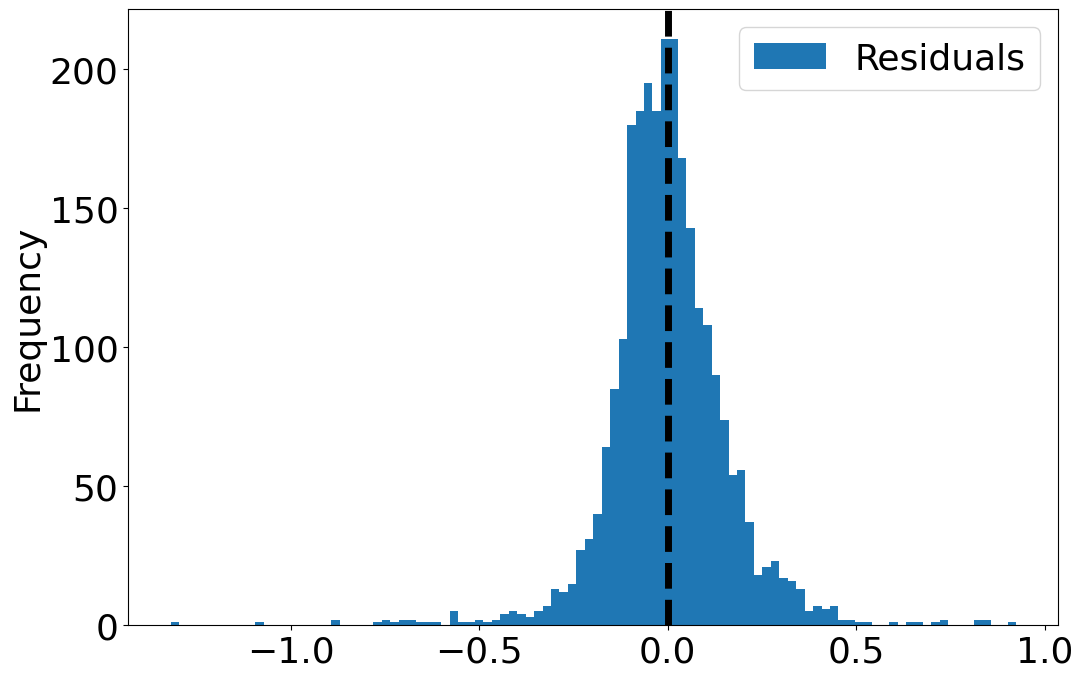

In [48]:
# plot the residuals from the above. 
# This looks reasonable for a normal distribution

fig, ax = plt.subplots(figsize = (12,8))
r_df[["Residuals"]].plot.hist(bins = 100, ax = ax)

# vertical line plot of mean of residuals
ax.axvline(r_df["Residuals"].mean(), ls = "--", linewidth = 5, color  = "k")

In [58]:
# create dictionary with results
results_dict = {"Beta":results.params,
               "t-stats": results.tvalues,
               "p-values": results.pvalues,
               "SE": results.bse}



results_df = pd.DataFrame(results_dict).round(3)
results_df.to_csv("y = RGPDPC, X = EFW, LogDiffResults")
results_df

,Beta,t-stats,p-values,SE
Size of Government,0.010,3.634,0.000,0.003
Legal System and Property Rights,-0.012,-4.197,0.000,0.003
Sound Money,-0.002,-0.609,0.543,0.002
Freedom to Trade Internationally,0.009,2.954,0.003,0.003
Regulation,0.023,5.724,0.000,0.004
Constant,-0.082,-3.622,0.000,0.023


<AxesSubplot:xlabel='RGDP Per Capita', ylabel='Predictor'>

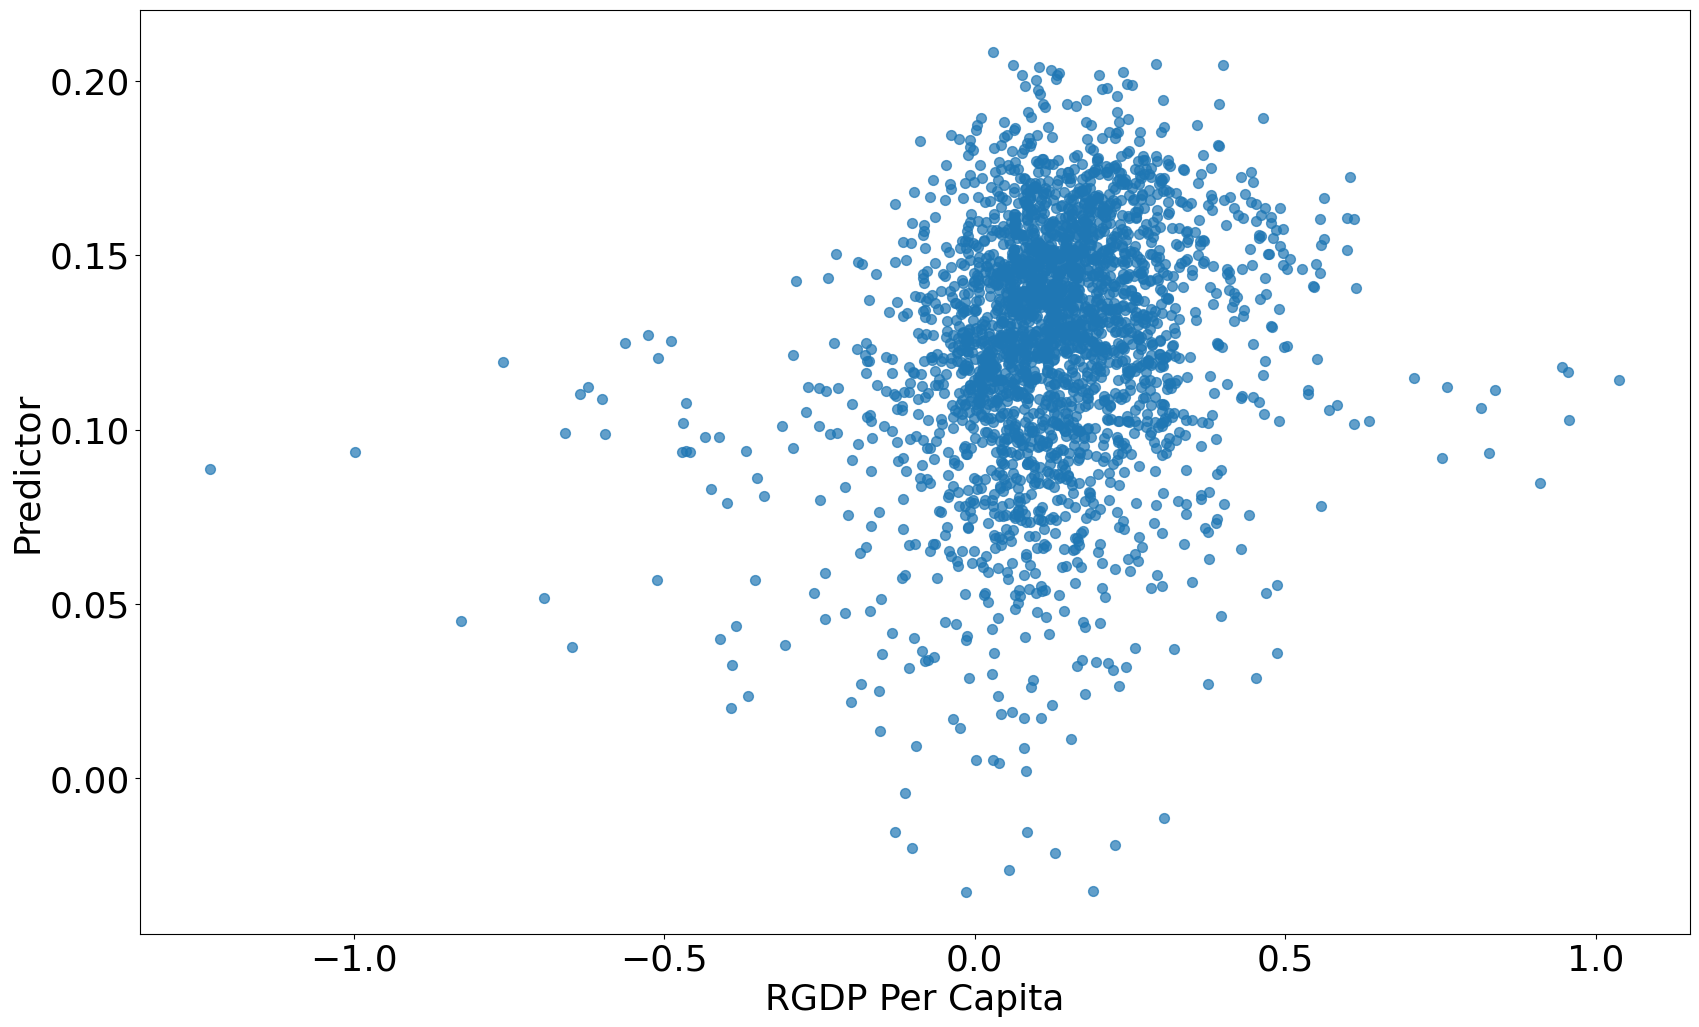

In [61]:
# graph scatter of predictor and RGDP per capita (Predicted vs Observed)

fig, ax = plt.subplots(figsize = (20,12))
r_df.plot.scatter(x = y_var[0],
                 y = "Predictor",
                 s = 50,
                 alpha = .7,
                 ax = ax)

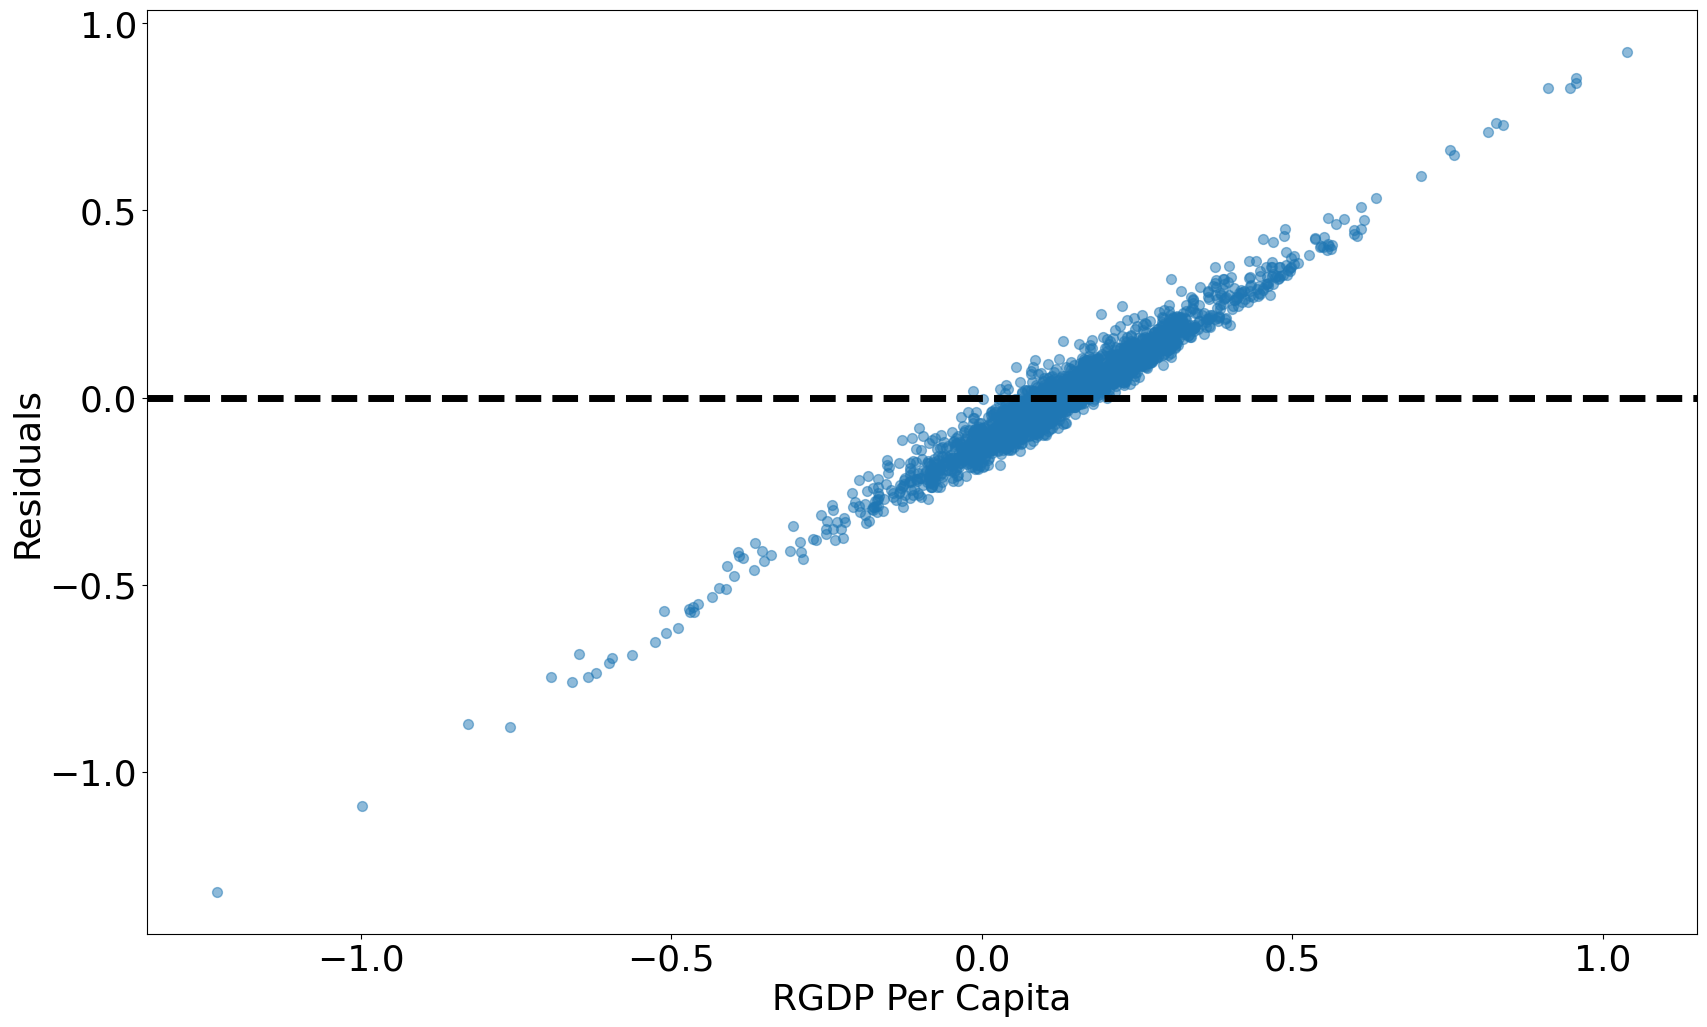

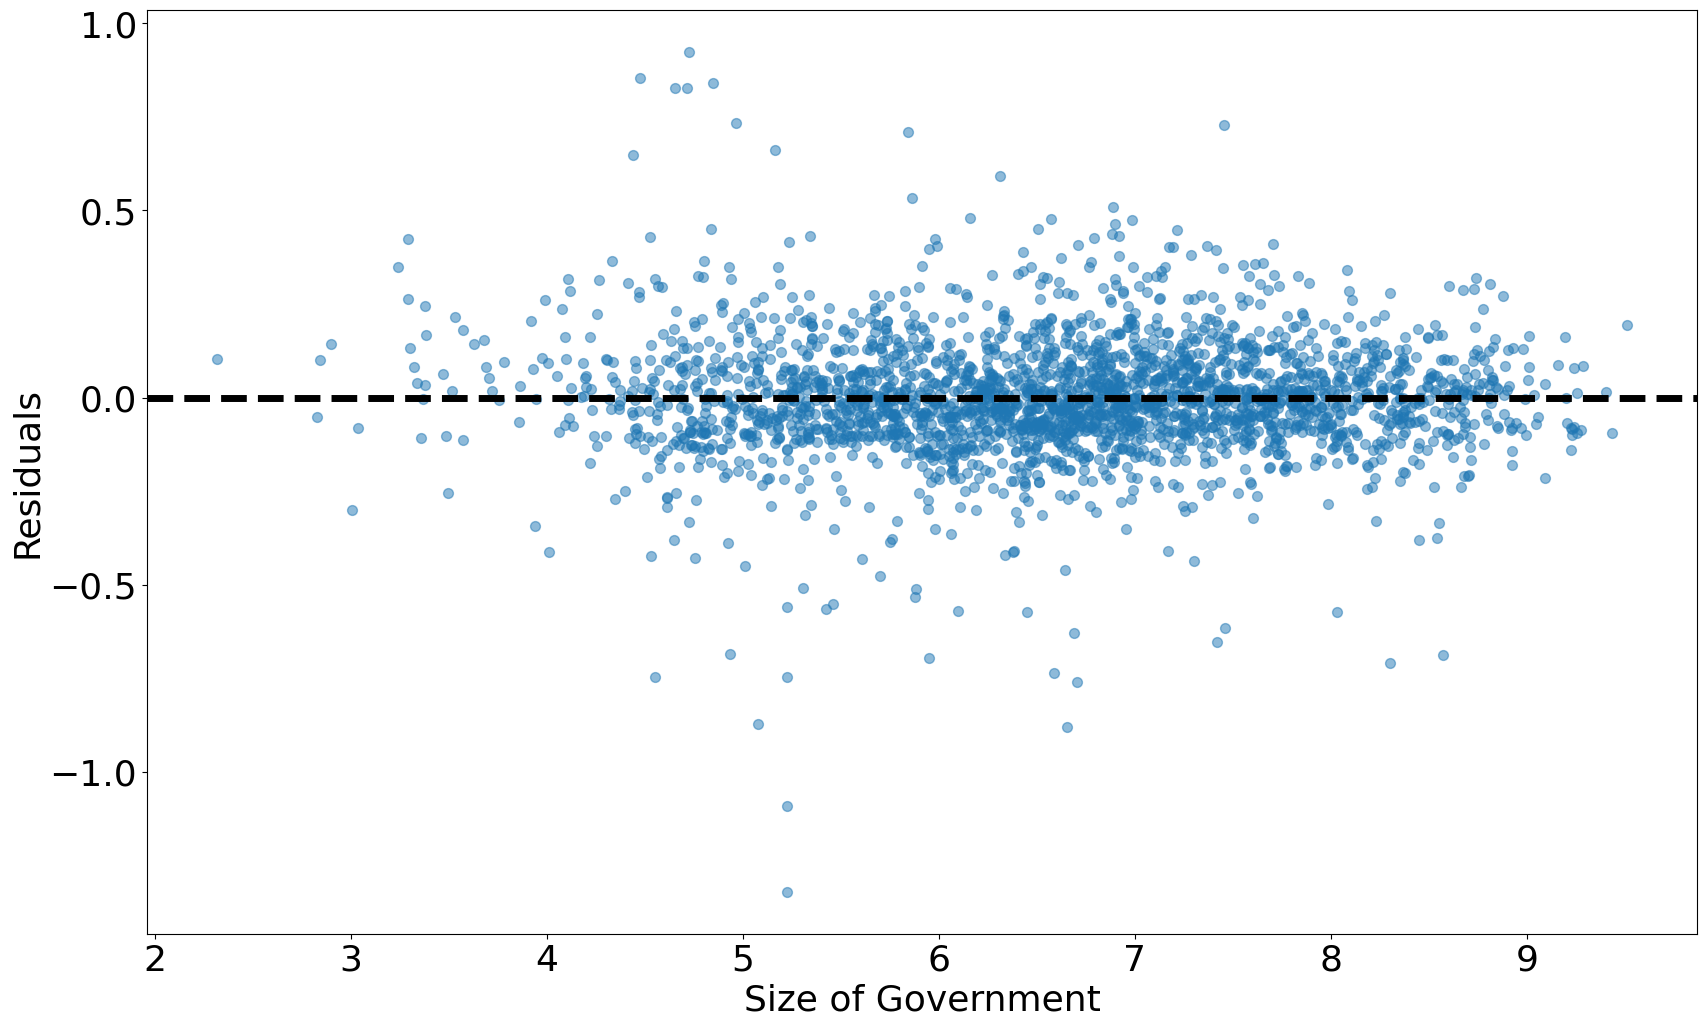

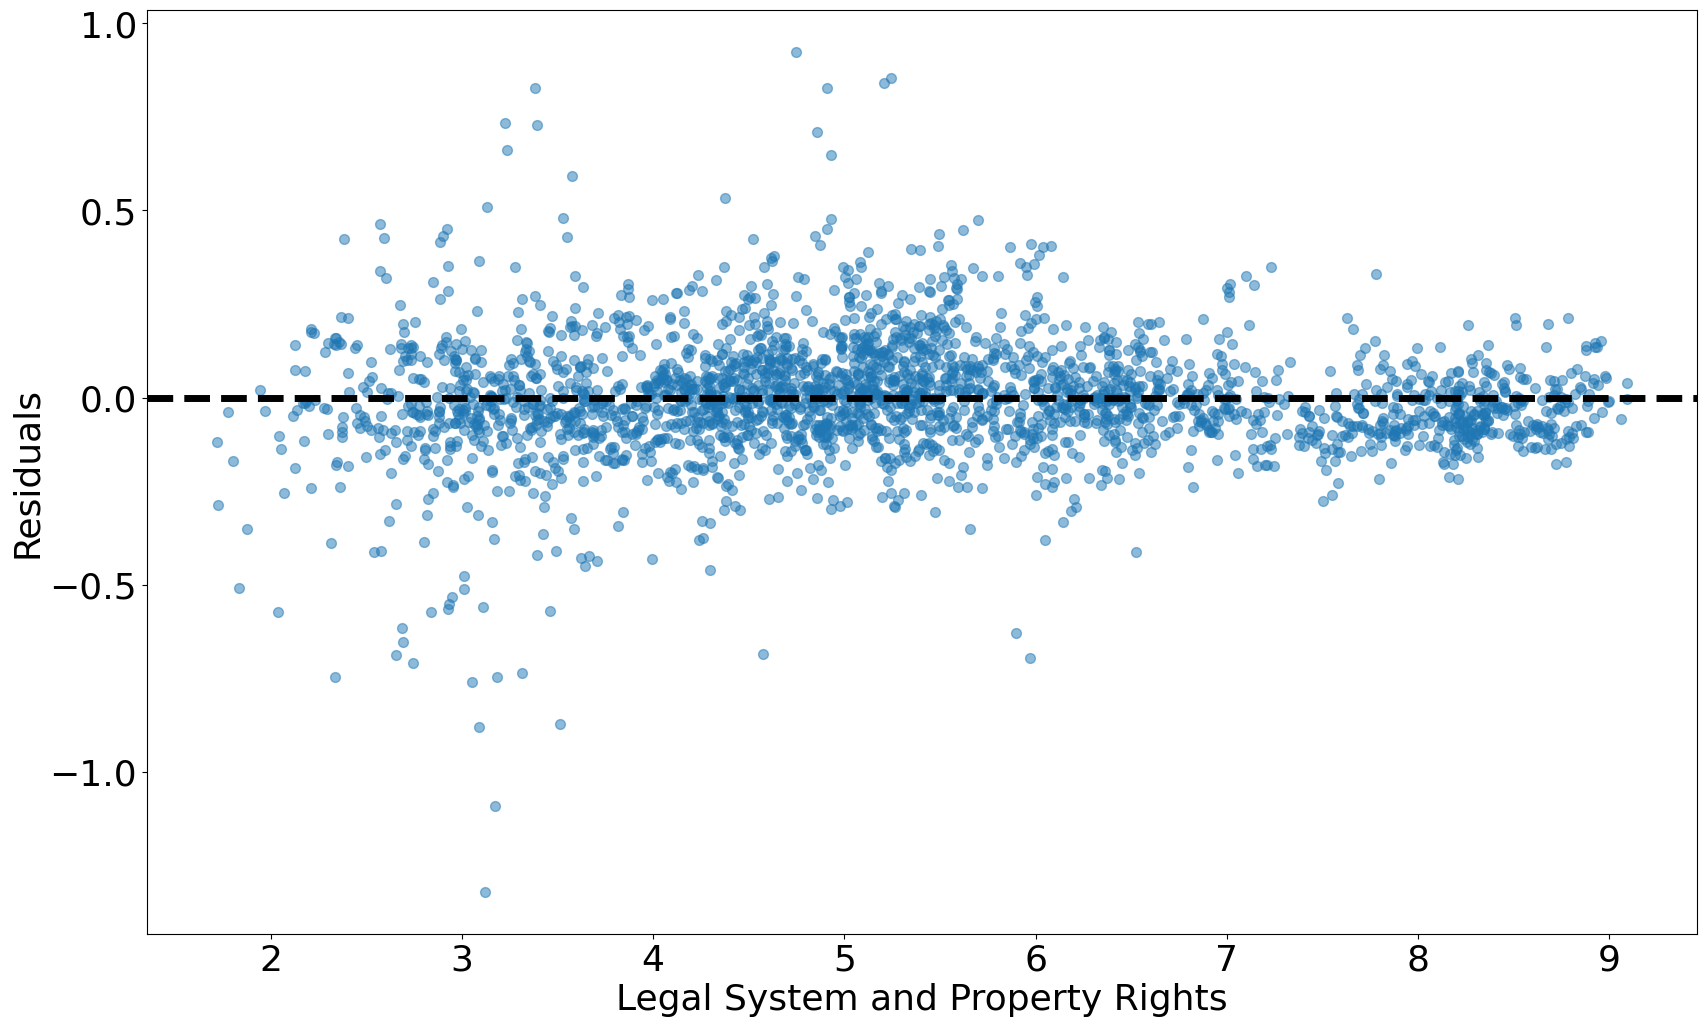

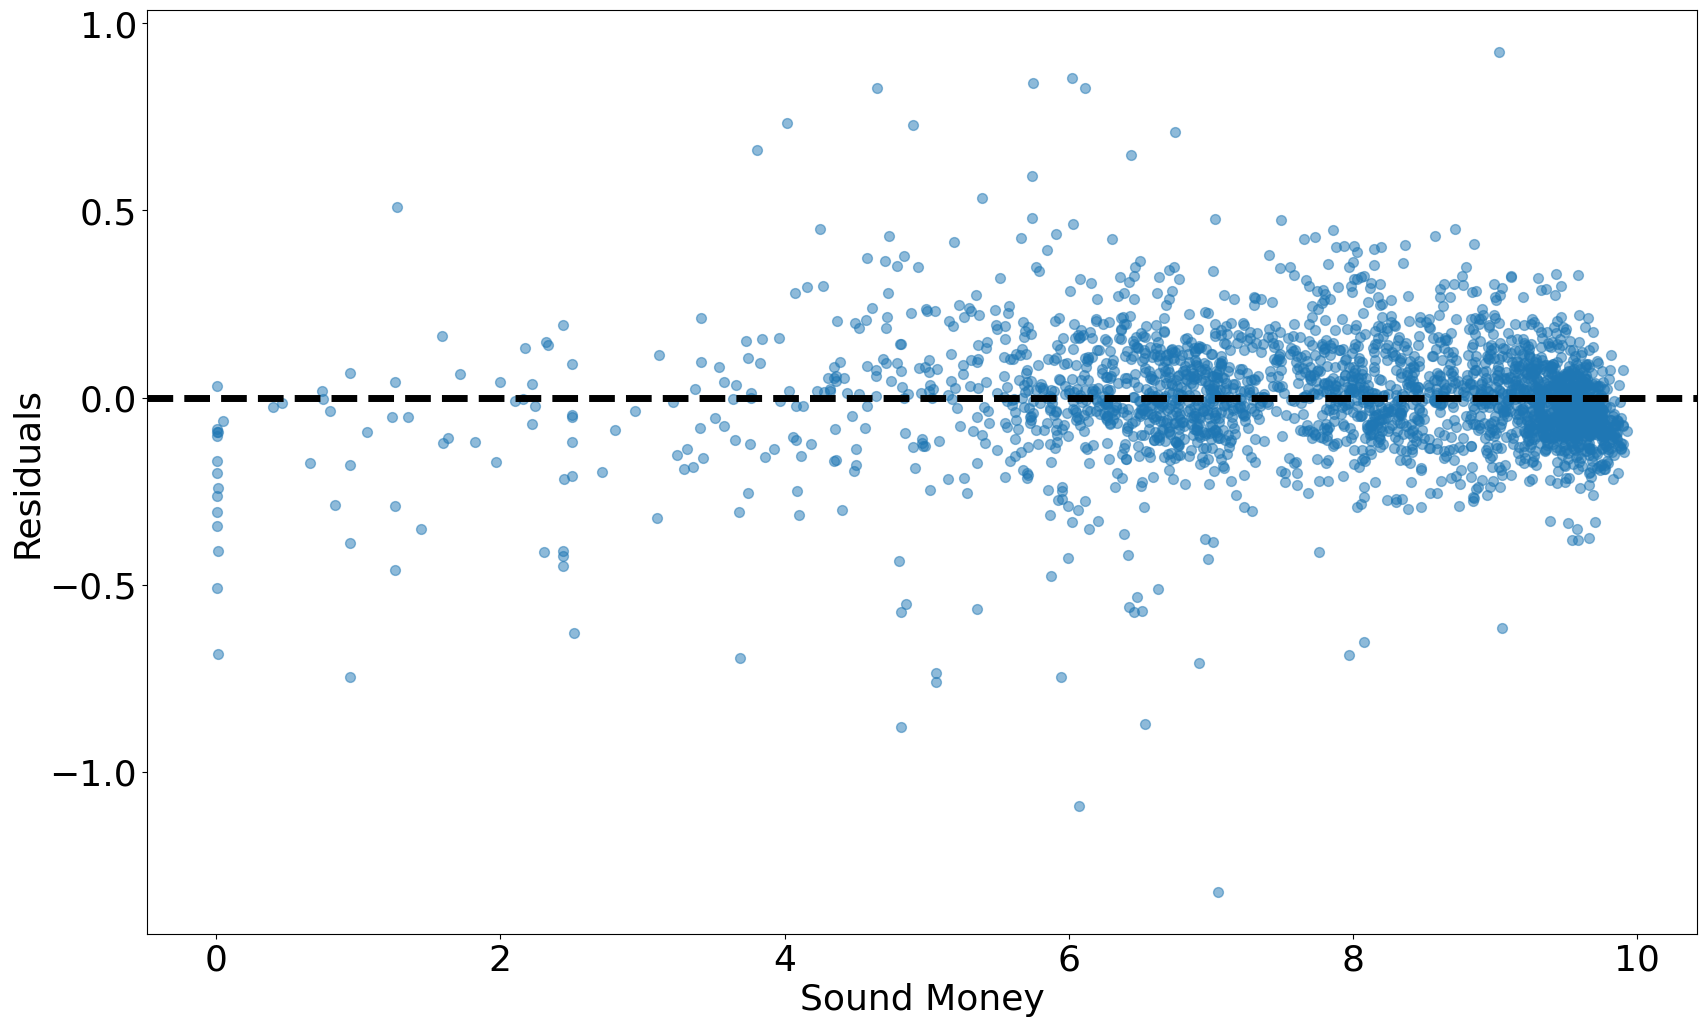

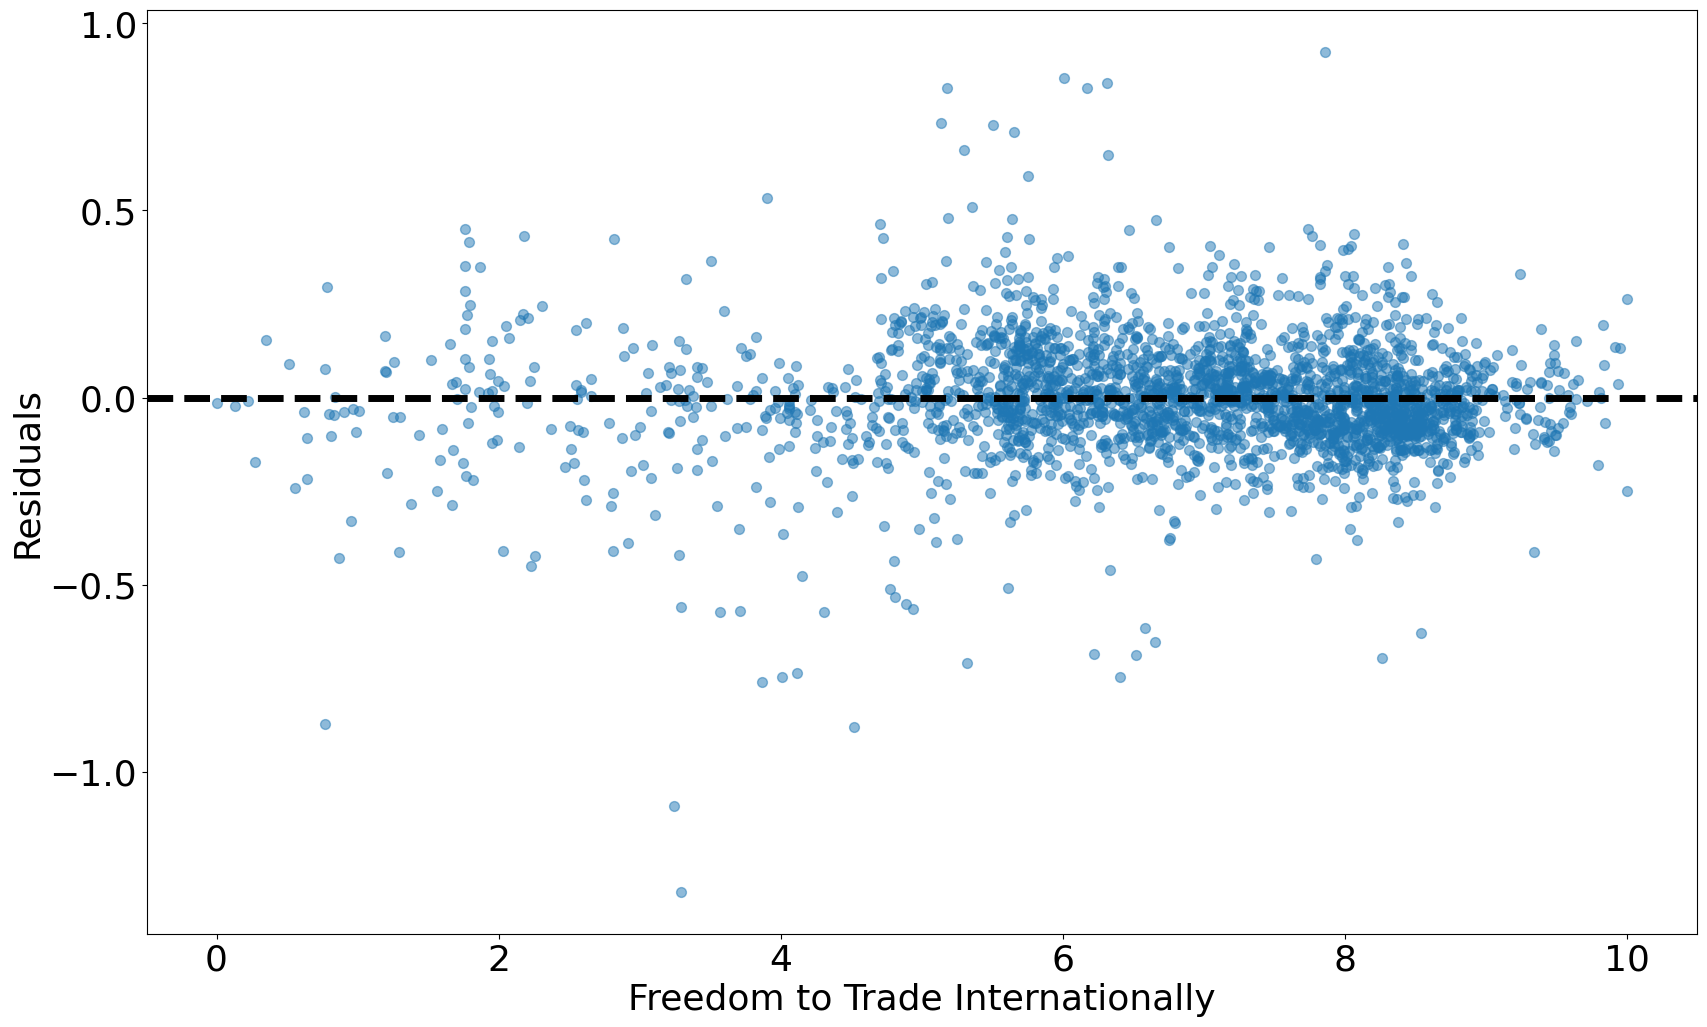

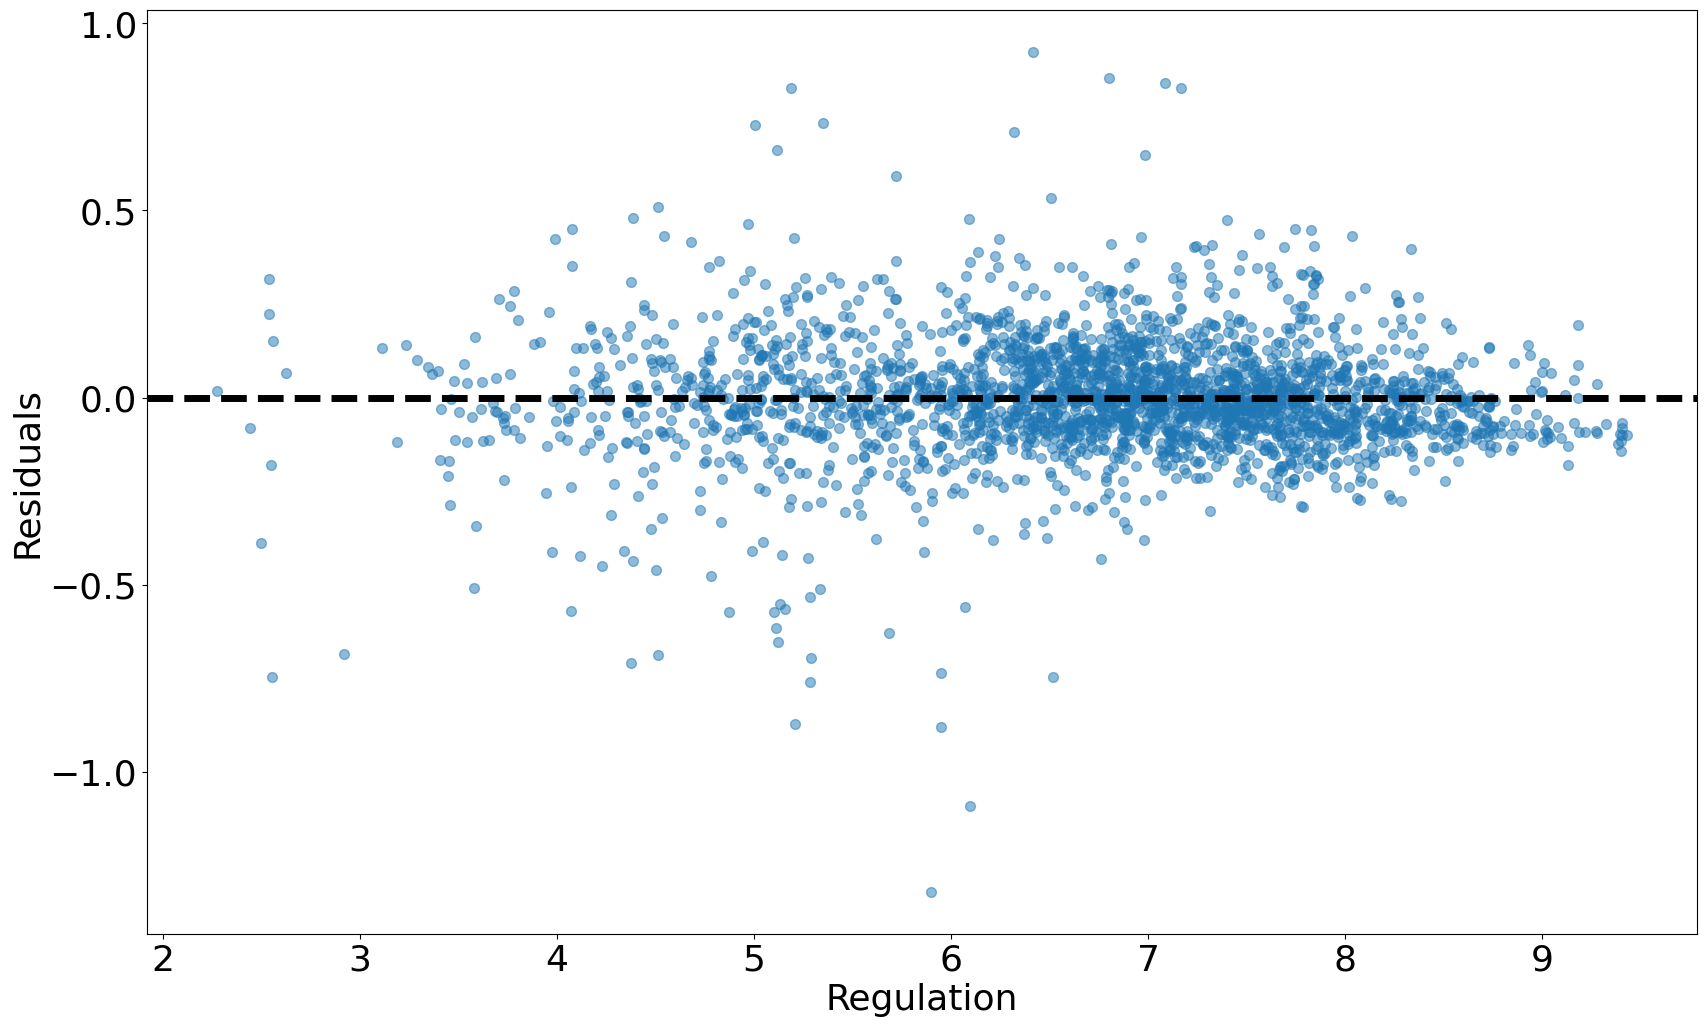

In [66]:
all_vars = y_var + x_vars


# plot residuals versus every variable using for loop to see correlation
for var in all_vars:
    fig, ax = plt.subplots(figsize = (20,12))
    r_df.plot.scatter(x = var,
                     y = "Residuals",
                     s = 50,
                     alpha = .5,
                     ax = ax)
    
    ax.axhline(r_df["Residuals"].mean(), ls = "--", linewidth = 5, color  = "k")